# Reto 01

**Dr. Antonio Arista Jalife**

Este reto es bastante sencillo: Crear una neurona con una función de activación simple (
) por lo que deberás de crear tres funciones: calcularZ, calcularSalida, y unirlos en una función llamada "neurona"

In [ ]:
import numpy as np

Primero se calculará la ecuación: z = w1x1 + w2x2 + w3x3 + ... + b

In [ ]:
def calcularZ(w, x, b):
  z = np.dot(w,x) + b
  return z

In [ ]:
w = [1,2,3]
x = [1,2,3]
b = 4
z = calcularZ(w,x,b)
print(z)

18


Luego se calcula la salida con: y = g(z) = z

Toma en cuenta que esta función de activación es "dummy", en los siguientes ejemplos se modificará esta función

In [ ]:
def calcularSalida(z):
  y_predicha = z
  return y_predicha

Finalmente se calcula la neurona uniendo las dos funciones

In [ ]:
def neurona(w,x,b):
  z = calcularZ(w,x,b)
  y = calcularSalida(z)
  return y

In [ ]:
w = [1,2,3]
x = [1,2,3]
b = 4
print(neurona(w,x,b))

18


# Reto 02

# Dr. Antonio Arista Jalife

En este reto el objetivo será crear una función que inicialice una capa neuronal: La función de inicialización debe recibir de como input el número de caracteristicas (o entradas) y el número de neuronas, y el output de la función debe entregar los pesos sinápticos y bias en forma de arreglos y matrices de NumPy.

In [ ]:
import numpy as np

En primer lugar creamos las funciones de la neurona.

In [ ]:
def calcularZ(w,x,b):
  z = np.dot(w,x) + b
  return z

def activacion(z):
  y = 1 / (1 + np.exp(-z))
  return y

def capaNeuronal(w,x,b):
  z = calcularZ(w,x,b)
  y_pred= activacion(z)
  return y_pred

**Función de inicializar capa.**

Esta es la función que inicializa una de las capas neuronales (en la literatura "layers"). Los pesos sinápticos W se colocarán transpuestos de una vez, por conveniencia.

In [ ]:
def inicializarCapa(numCaracteristicas, numNeuronas):
  w = np.random.rand(numCaracteristicas, numNeuronas)
  w_transpose = w.T
  b = np.random.rand(numNeuronas)
  return w_transpose, b

Probemos las capas neuronales: primero una inicialización de 3 características y 2 neuronas.

In [ ]:
w, b = inicializarCapa(3, 2)
print(w.shape)
print(b.shape)

(2, 3)
(2,)


Y luego, veamos como reacciona con una entrada de 10 características y 2 neuronas. La salida deben ser 2 valores en un array.

In [ ]:
x = np.array([0,1,2,3,4,3,2,1,0,-1]) #10 caracteristicas de entrada
w, b = inicializarCapa(10, 2) #10 caracteristicas, 2 neuronas
y = capaNeuronal(w, x, b)
print(y)

[0.99144484 0.97778505]


# Reto 03

**Dr. Antonio Arista Jalife.**

El objetivo de este reto es que construyas un clasificador multiclase con lo aprendido sobre redes neuronales. Para este caso utiliza la función MLPClassifier, y para evaluar la precisión, utiliza np.trace (recuerda que la precisión se calcula sumando la diagonal de una matriz y dividiendola entre el numero de muestras.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Crearemos 1000 datos, con 4 centros y 10 características, aunque solamente plottearemos la característica 0 y 1. Cada que corras la celda siguiente el dataset cambiará.

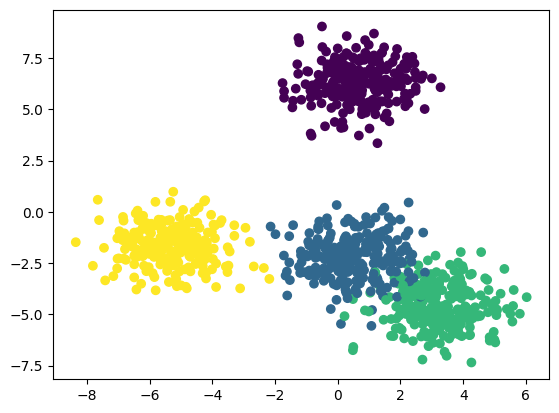

In [2]:
x, y = make_blobs(n_samples=1000, centers=4, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

Probemos que tal funciona una red neuronal con 10 neuronas de primera capa y 4 de segunda capa. Si estas viendo esto una vez completado el reto, te invito a cambiar el valor de hidden_layer_sizes para que veas que tal se comporta

**NOTA: El correr esta celda puede llevar un rato! aproximadamente unos 3 o 4 minutos. Preparate un café mientras tanto...**

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


**Métricas de desempeño de nuestra Red Neuronal.**

En la sesión 02 mencioné que para calcular el accuracy, tienes que obtener la diagonal de la matriz de confusión, esto se hace con la función np.trace

In [4]:
from sklearn.metrics import confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[102   0   0   0]
 [  0 102   0   0]
 [  0   0  98   0]
 [  0   0   0  98]]
Accuracy: 100.0%
